In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Countries of the World

In [2]:
countries = pd.read_csv('/kaggle/input/countries-of-the-world/countries of the world.csv')
# dataset is updated five years ago so we take year = 2018.

countries.rename(columns={'GDP ($ per capita)':'GDP'},inplace=True)
countries.drop(['Area (sq. mi.)','Pop. Density (per sq. mi.)','Population'],axis=1,inplace=True)
new_list=[]
for country in countries.Country.tolist():
    new_list.append(country.rstrip())
countries.Country=new_list
countries

,Country,Region,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP,Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),"0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,"1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,"0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,"58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,"0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,"0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,"0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,"0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,"0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [3]:
countries.isnull().sum()

Country                                0
Region                                 0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP                                    1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

### Alcohol Consumption Rate

In [4]:
alcohol = pd.read_csv('/kaggle/input/alcohol-consumption-by-country/alcohol-consumption-vs-gdp-per-capita.csv')
alcohol.drop(['GDP per capita, PPP (constant 2017 international $)','Continent','Code','Population (historical estimates)'],axis=1,inplace=True)
alcohol.rename(columns={'Entity':'Country' , 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)': 'Alcohol Rate'}, inplace=True)
alcohol = alcohol[(alcohol.Year == 2010) | (alcohol.Year ==2018) | (alcohol.Year == 2015)]
pv_alcohol = alcohol.pivot('Country','Year','Alcohol Rate')
pv_alcohol.columns = [c for c in pv_alcohol.columns]
pv_alcohol.reset_index(inplace=True)
pv_alcohol.rename(columns={2010:'2010_alc',2015:'2015_alc',2018:'2018_alc'},inplace=True)

### Unemployment Rate

In [5]:
unemploymnet = pd.read_csv('/kaggle/input/unemployment-dataset/unemployment analysis.csv')
unemploymnet.rename(columns={'Country Name':'Country','Country Code':'Code'},inplace=True)
unemploymnet['2010_int'] =  (unemploymnet['2006'] + unemploymnet['2007']+unemploymnet['2008']+unemploymnet['2009'] + unemploymnet['2010'])/5
unemploymnet['2015_int'] =  (unemploymnet['2011'] + unemploymnet['2012']+unemploymnet['2013']+unemploymnet['2014'] + unemploymnet['2015'])/5
unemploymnet=unemploymnet[['Country','2010_int','2015_int','2018']]
unemploymnet.rename(columns={'2010_int':'2010_int_un','2015_int':'2015_int_un','2018':'2018_un'},inplace=True)

In [6]:
unemploymnet

,Country,2010_int_un,2015_int_un,2018_un
0,Africa Eastern and Southern,6.638,6.532,6.73
1,Afghanistan,11.230,11.170,11.15
2,Africa Western and Central,4.602,4.584,6.04
3,Angola,4.936,7.368,7.42
4,Albania,14.484,15.594,12.30
...,...,...,...,...
230,Samoa,5.584,8.064,8.69
231,"Yemen, Rep.",12.612,13.382,13.15
232,South Africa,25.098,24.794,26.91
233,Zambia,11.102,9.300,12.01


In [7]:
unemploymnet.isnull().sum()

Country        0
2010_int_un    0
2015_int_un    0
2018_un        0
dtype: int64

### World happiness

In [8]:
happiness = pd.read_csv('/kaggle/input/world-happiness-report-2021/world-happiness-report.csv')
happiness.rename(columns={'Country name':'Country'},inplace=True)
happiness = happiness[happiness.year == 2017]
happiness.drop(['Log GDP per capita','year'],axis=1,inplace=True)
happiness.reset_index(drop=True, inplace=True)

In [9]:
happiness

,Country,Life Ladder,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2.662,0.491,52.8,0.427,-0.121,0.954,0.496,0.371
1,Albania,4.640,0.638,68.4,0.750,-0.029,0.876,0.669,0.334
2,Algeria,5.249,0.807,65.7,0.437,-0.167,0.700,0.642,0.289
3,Argentina,6.039,0.907,68.6,0.832,-0.186,0.841,0.809,0.292
4,Armenia,4.288,0.698,66.6,0.614,-0.147,0.865,0.625,0.437
...,...,...,...,...,...,...,...,...,...
142,Venezuela,5.071,0.896,66.3,0.636,-0.169,0.844,0.726,0.363
143,Vietnam,5.175,NaN,67.7,NaN,NaN,NaN,NaN,NaN
144,Yemen,3.254,0.790,55.9,0.595,-0.147,NaN,0.455,0.295
145,Zambia,3.933,0.744,54.8,0.823,0.140,0.740,0.685,0.387


### Adult Education Level

In [10]:
adult_edu_level = pd.read_csv('/kaggle/input/adult-education-level/DP_LIVE_04022023182308959.csv')
adult_edu_level.drop(['Flag Codes','INDICATOR','SUBJECT','MEASURE','FREQUENCY'],axis=1,inplace=True)
adult_edu_level.rename(columns={'LOCATION':'Code','TIME':'Year'},inplace=True)

In [11]:
pv_edu = adult_edu_level.pivot('Code','Year','Value')
pv_edu.columns = [c for c in pv_edu.columns]
pv_edu.reset_index(inplace=True)
pv_edu = pv_edu[['Code',2010,2015,2018]]
pv_edu.rename(columns={2010:'2010_edu',2015:'2015_edu',2018:'2018_edu'},inplace=True)

In [12]:
!pip install country_converter
import country_converter as coco

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for country_converter: filename=country_converter-0.8.0-py3-none-any.whl size=55658 sha256=34868b8ceb0daede65d9ba6a931e6dc2f7dcb99ac99c082de57696b56ab3a0ab
  Stored in directory: /root/.cache/pip/wheels/ac/ef/42/232d7f54c493023bbf8710c3ab50939d833a2e4062afd0dea3
Successfully built country_converter


In [13]:
pv_edu['Country'] = pv_edu.Code.apply(lambda x: coco.convert(names=x, to='name_short', not_found=None))
pv_edu.drop('Code',axis=1,inplace=True)

In [14]:
crime_index = pd.read_csv('/kaggle/input/crime-index-2018/crime_index.csv')
crime_index.drop(['Unnamed: 0','1'],axis=1,inplace=True)
crime_index.rename(columns={'2':'Country','3':'Crime Rate'},inplace=True)
crime_index.drop('4',axis=1,inplace=True)

In [15]:
crime_index.isnull().sum()

Country       0
Crime Rate    0
dtype: int64

In [16]:
crime_index

,Country,Crime Rate
0,Papua New Guinea,80.0
1,Honduras,78.9
2,South Africa,75.7
3,Trinidad And Tobago,72.2
4,Brazil,70.6
...,...,...
109,Georgia,20.3
110,United Arab Emirates,18.7
111,Singapore,16.2
112,Qatar,15.7


### Population

In [17]:
population = pd.read_csv('/kaggle/input/world-population-live-dataset/World Population Live Dataset.csv')
population.rename(columns={'Name':'Country','2020':"2020_pop",'2015':'2015_pop','2010':'2010_pop'},inplace=True)
population = population[['Country','2020_pop','2015_pop','2010_pop']]

In [18]:
population

,Country,2020_pop,2015_pop,2010_pop
0,China,1424930,1393715,1348191
1,India,1396387,1322867,1240614
2,United States,335942,324608,311183
3,Indonesia,271858,259092,244016
4,Pakistan,227197,210969,194454
...,...,...,...,...
229,Montserrat,5,5,5
230,Falkland Islands,4,3,3
231,Niue,2,2,2
232,Tokelau,2,1,1


### Population

In [19]:
df_pop2 = pd.read_csv('/kaggle/input/population/Population.csv')
df_pop2.drop(['Unnamed: 0','Index','Population(2020)'],axis=1,inplace=True)

In [20]:
df_pop2

,Country,World share %,Area,Density
0,India,17.7,2973190,464.149410
1,United States,4.2,9147420,36.185356
2,Indonesia,3.5,1811570,150.987053
3,Pakistan,2.8,770880,286.545688
4,Brazil,2.7,8358140,25.431426
...,...,...,...,...
189,San Marino,0.0,60,565.516667
190,Palau,0.0,460,39.334783
191,Tuvalu,0.0,30,393.066667
192,Nauru,0.0,20,541.200000


### Merging All data

In [21]:
df = pd.merge(df_pop2,countries, on='Country', how='left')
df = pd.merge(df,population, on='Country', how='left')
df = pd.merge(df,pv_alcohol, on='Country', how='left')
df = pd.merge(df,unemploymnet, on='Country', how='left')
df=df[~df['GDP'].isna()]
df.reset_index(drop=True,inplace=True)
# df = pd.merge(df,crime_index, on='Country', how='left') #because of high missing values we delete crime rate

In [22]:
df.isnull().sum(),df.shape

(Country                                0
 World share %                          0
 Area                                   0
 Density                                0
 Region                                 0
 Coastline (coast/area ratio)           0
 Net migration                          0
 Infant mortality (per 1000 births)     0
 GDP                                    0
 Literacy (%)                           5
 Phones (per 1000)                      1
 Arable (%)                             0
 Crops (%)                              0
 Other (%)                              0
 Climate                               18
 Birthrate                              1
 Deathrate                              1
 Agriculture                            3
 Industry                               4
 Service                                4
 2020_pop                               2
 2015_pop                               2
 2010_pop                               2
 2010_alc                         

In [23]:
columns_to_change=['Coastline (coast/area ratio)', 'Net migration', 'Infant mortality (per 1000 births)',
                  'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate',
                  'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']

df[columns_to_change] = df[columns_to_change].apply(lambda x: x.str.replace(',','.'))
df[columns_to_change] =df[columns_to_change].astype('float64')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             171 non-null    object 
 1   World share %                       171 non-null    float64
 2   Area                                171 non-null    int64  
 3   Density                             171 non-null    float64
 4   Region                              171 non-null    object 
 5   Coastline (coast/area ratio)        171 non-null    float64
 6   Net migration                       171 non-null    float64
 7   Infant mortality (per 1000 births)  171 non-null    float64
 8   GDP                                 171 non-null    float64
 9   Literacy (%)                        166 non-null    float64
 10  Phones (per 1000)                   170 non-null    float64
 11  Arable (%)                          171 non-n

In [25]:
from sklearn.compose import make_column_selector

cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)

In [26]:
# from sklearn.preprocessing import LabelEncoder,StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import make_column_transformer

# cat_linear_processor = LabelEncoder()
# num_linear_processor = make_pipeline(
#     StandardScaler(),
#     SimpleImputer(strategy="mean", add_indicator=True),
# )

# linear_preprocessor = make_column_transformer(
# #     (cat_linear_processor, cat_selector),
#     (num_linear_processor, num_selector), 
# )
# linear_preprocessor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer_n', SimpleImputer(strategy='mean')),
    
])


# categorical_transformer = Pipeline(steps=[
#     ('imputer_c', SimpleImputer(strategy='most_frequent')),
#     ('label', LabelEncoder())
# ])



#  i don't know why but at first it worked but in my last edit i couldn't use categorical transformer
#  it is saying `label encoder requires 2 but given 3` i try to find but couldn't find the problem




preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_selector),
#         ('cat', categorical_transformer, cat_selector)
    ])

In [27]:
from sklearn.linear_model import LinearRegression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LinearRegression())
                             ])

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop('GDP', axis=1)
y = df['GDP']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=250
    )

In [29]:
X_train

,Country,World share %,Area,Density,Region,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),...,Service,2020_pop,2015_pop,2010_pop,2010_alc,2015_alc,2018_alc,2010_int_un,2015_int_un,2018_un
119,Eritrea,0.0,101000,35.113079,SUB-SAHARAN AFRICA,1.84,0.00,74.87,58.6,7.9,...,0.643,3556.0,3340.0,3148.0,1.38,1.42,1.44,5.282,5.626,5.95
137,Mauritius,0.0,2030,626.486700,SUB-SAHARAN AFRICA,8.68,-0.90,15.03,85.6,289.3,...,0.643,1298.0,1293.0,1283.0,3.81,3.94,4.35,7.920,7.424,6.43
53,Romania,0.2,230170,83.580358,EASTERN EUROPE,0.09,-0.13,26.43,98.4,196.9,...,0.549,19442.0,19906.0,20335.0,13.97,11.64,11.74,6.658,6.936,4.19
131,Slovenia,0.0,20140,103.224330,EASTERN EUROPE,0.23,1.12,4.45,99.7,406.1,...,0.603,2118.0,2081.0,2057.0,11.54,12.74,11.90,5.648,9.148,5.11
164,Saint Kitts & Nevis,0.0,260,204.611538,LATIN AMER. & CARIB,51.72,-7.11,14.49,97.0,638.9,...,0.707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,Burkina Faso,0.3,273600,76.400852,SUB-SAHARAN AFRICA,0.00,0.00,97.57,26.6,7.0,...,0.482,21523.0,18718.0,16117.0,8.58,11.83,12.03,3.512,4.052,4.69
58,Guatemala,0.2,107160,167.185218,LATIN AMER. & CARIB,0.37,-1.67,35.93,70.6,92.1,...,0.585,17363.0,16001.0,14543.0,3.51,2.55,2.45,3.298,2.820,2.28
25,Spain,0.6,498800,93.734519,WESTERN EUROPE,0.98,0.99,4.42,97.9,453.5,...,0.665,47364.0,46431.0,46573.0,10.03,11.32,12.72,13.130,23.754,15.25
77,Greece,0.1,128900,80.861552,WESTERN EUROPE,10.37,2.35,5.53,97.5,589.7,...,0.733,10512.0,10807.0,11034.0,9.67,10.49,10.18,9.500,24.232,19.29


In [30]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer_n',
                                                                   SimpleImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2d5dd12410>)])),
                ('model', LinearRegression())])

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop('GDP', axis=1)
y = df['GDP']

scores = {}
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.20, random_state=i
            )
    lr_pipeline.fit(X_train, y_train)
    scores[i] = lr_pipeline.score(X_test, y_test)

In [32]:
sort_by_value = dict(sorted(scores.items(), key=lambda item: item[1],reverse=True))

In [33]:
val_acc=[]
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=219)
    lr_pipeline.fit(X_train, y_train)
    val_acc.append(lr_pipeline.score(X_test, y_test))
np.mean(val_acc)

0.8406625639962556

In [34]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr_pipeline, X, y, cv=5)
scores = cross_val_score(lr_pipeline, X_train, y_train, cv = 5)

In [35]:
scores.mean()

-0.5998680764915127

In [36]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=20, random_state=877, shuffle=True)

scores = cross_val_score(lr_pipeline, X, y, scoring='r2',
                         cv=cv, n_jobs=-1)

In [37]:
scores.mean()

0.5014759742959971

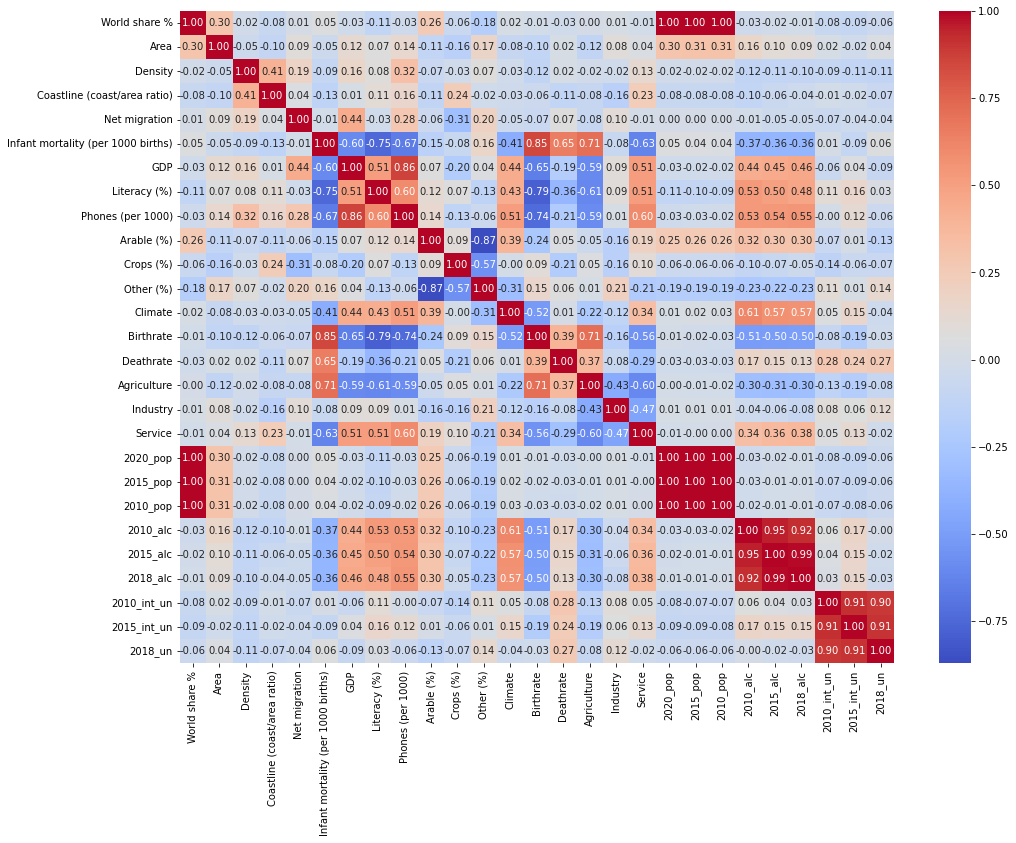

In [38]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

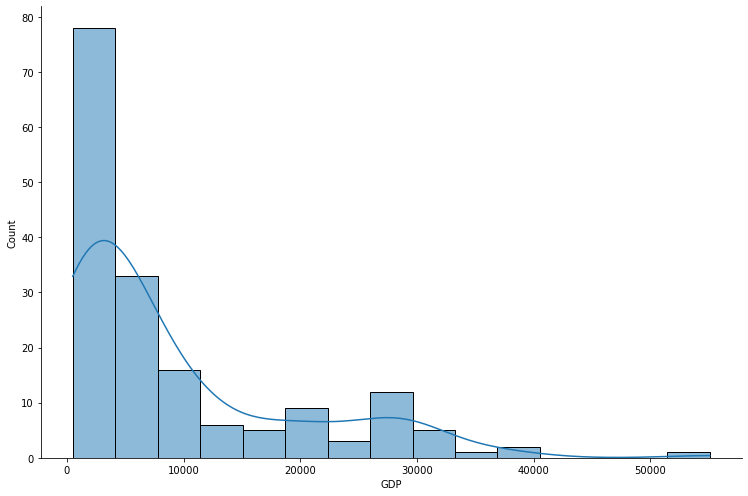

In [39]:
sns.displot(x=df['GDP'],kde=True,height=7,aspect=1.5);

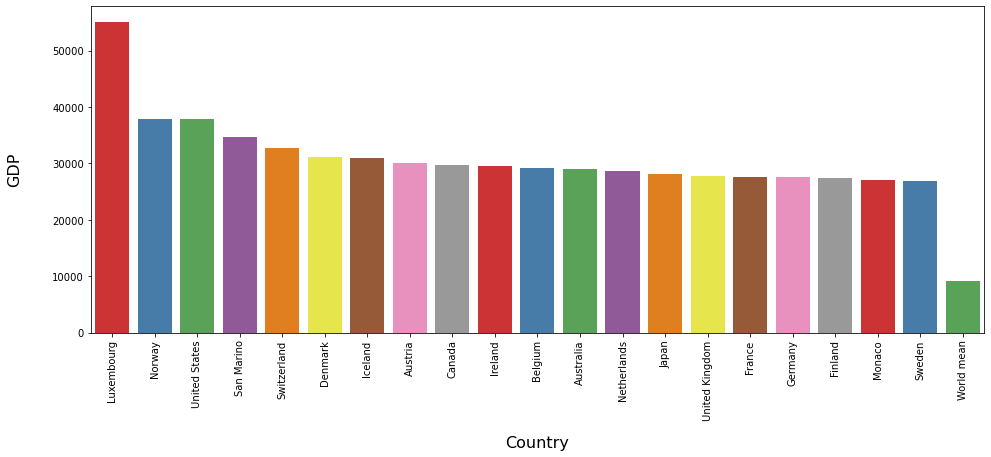

In [40]:
fig, ax = plt.subplots(figsize=(16,6))
top_gdp_countries = df.sort_values('GDP',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'GDP':[df['GDP'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP']],mean],ignore_index=True)
sns.barplot(x='Country', y='GDP', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

In [41]:
df.columns

Index(['Country', 'World share %', 'Area', 'Density', 'Region',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP', 'Literacy (%)',
       'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service',
       '2020_pop', '2015_pop', '2010_pop', '2010_alc', '2015_alc', '2018_alc',
       '2010_int_un', '2015_int_un', '2018_un'],
      dtype='object')

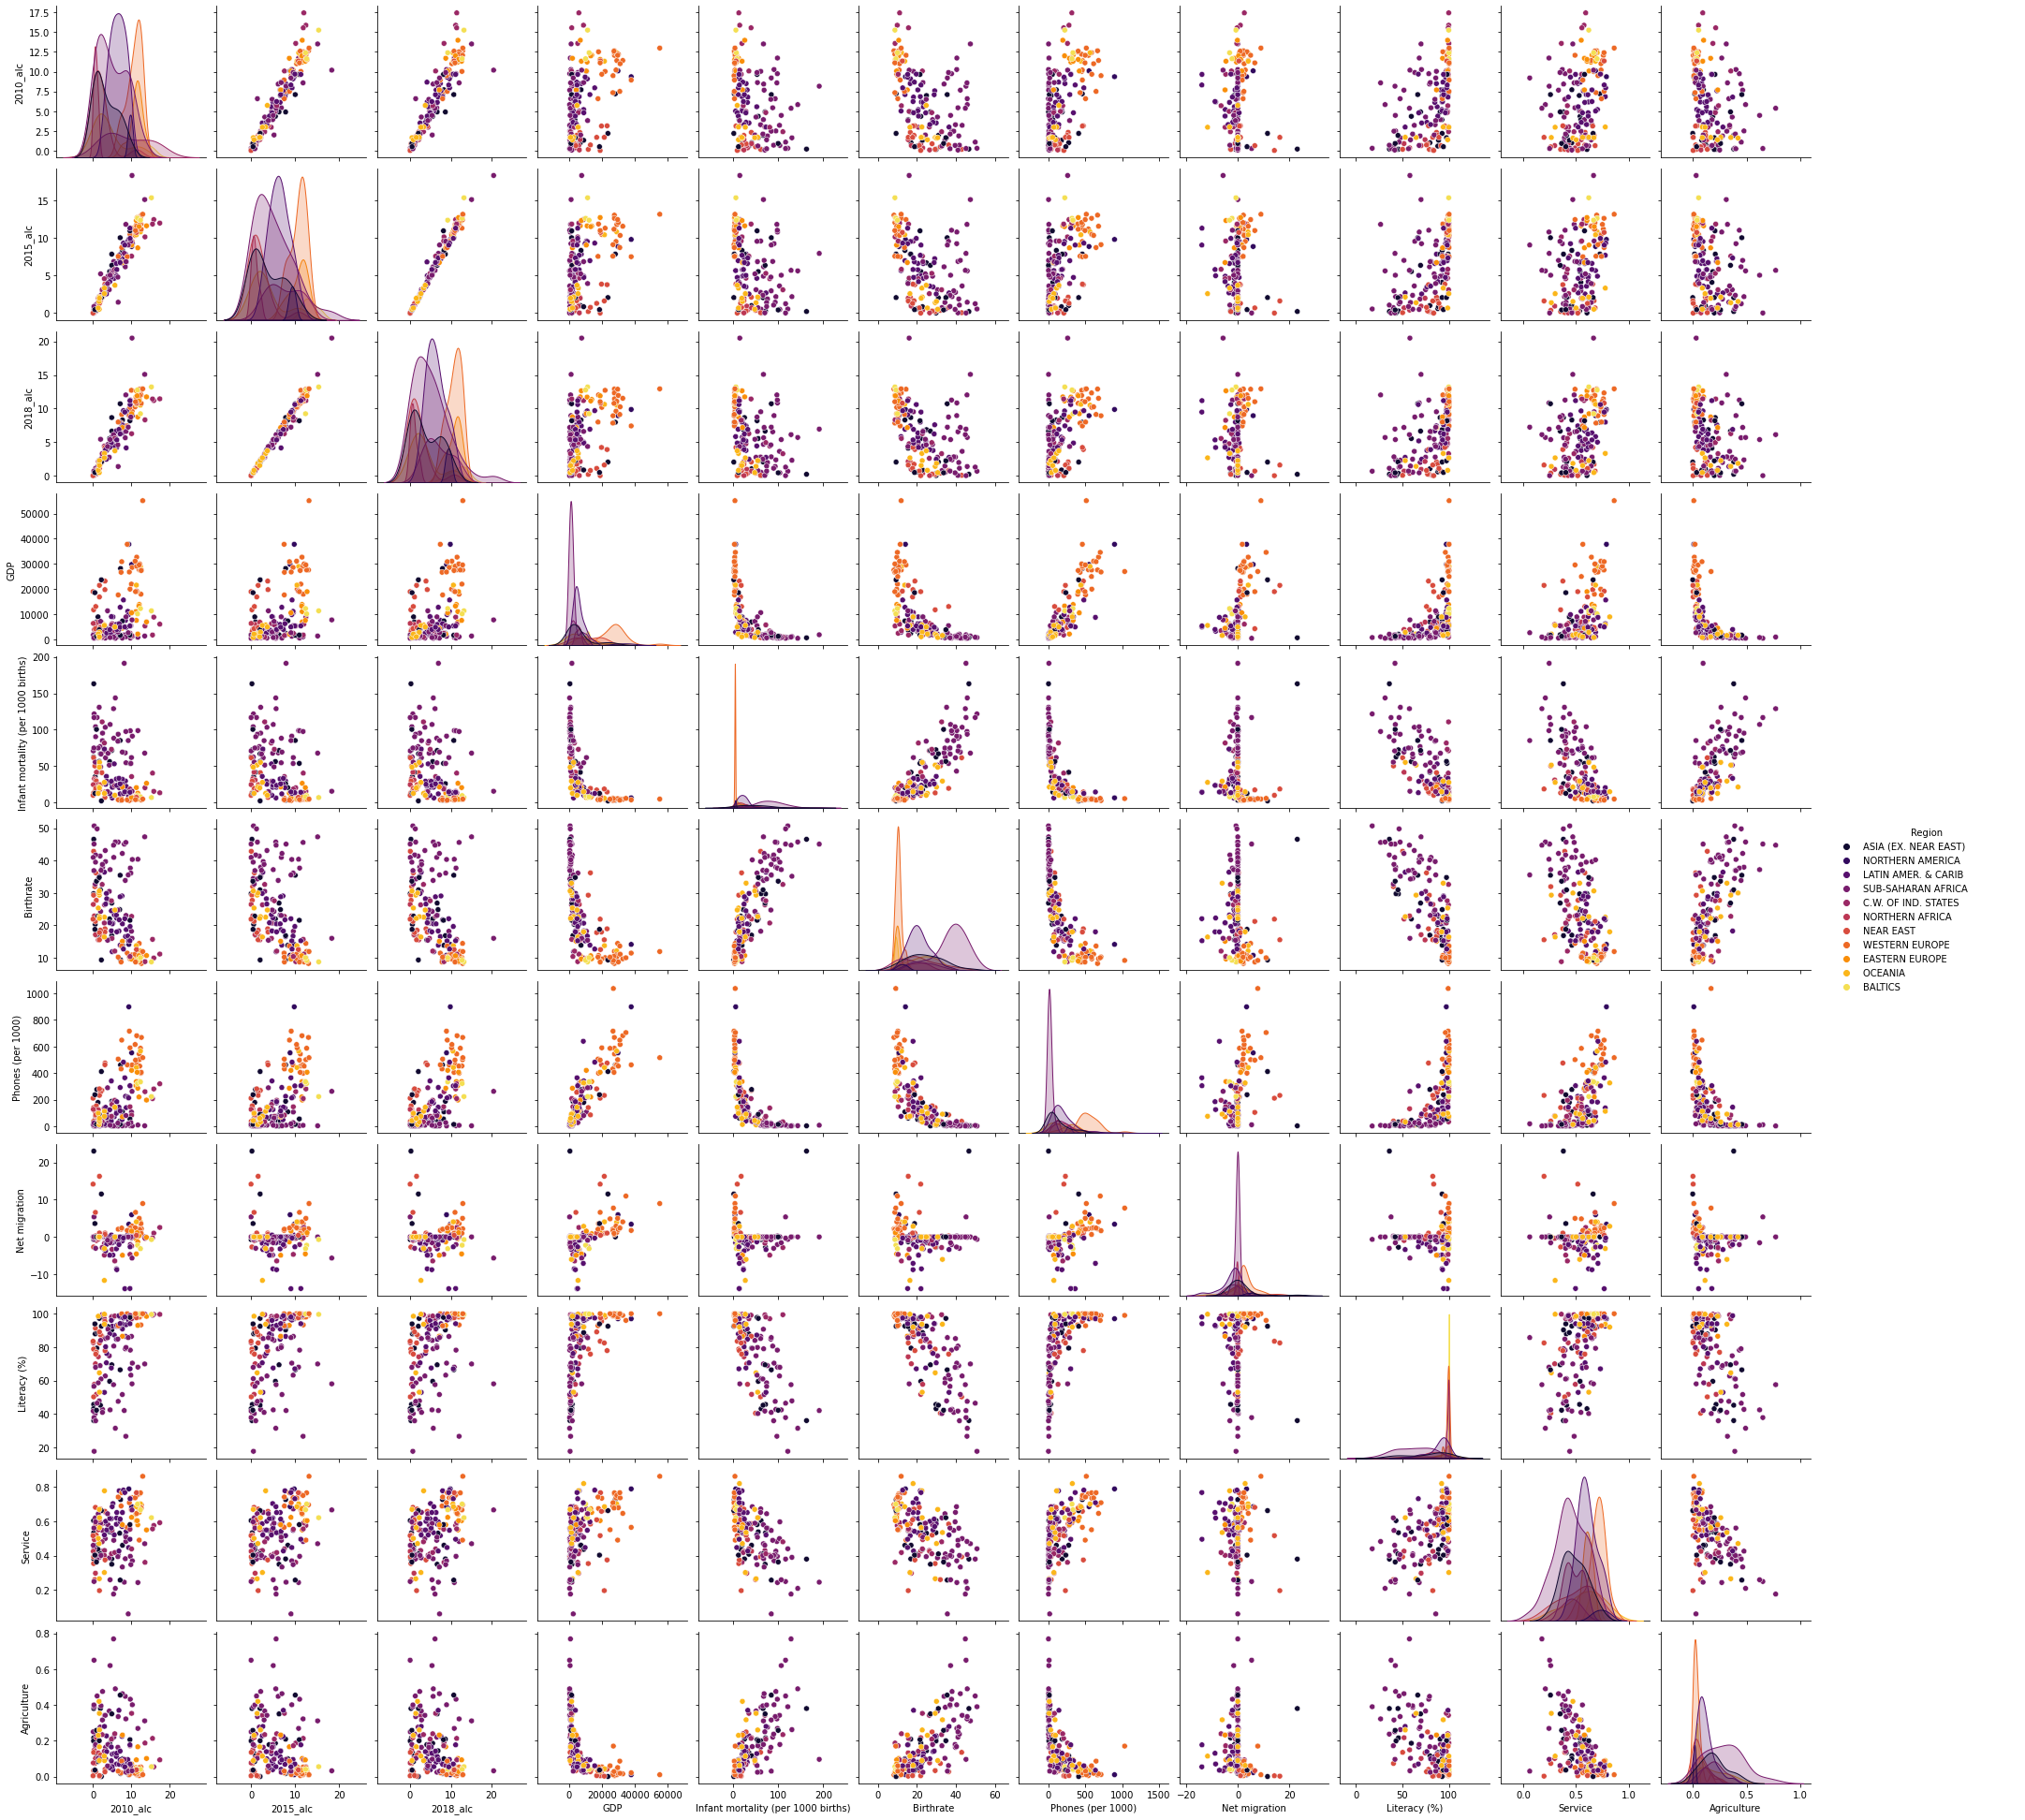

In [42]:
x = df.loc[:,["Region",'2010_alc','2015_alc','2018_alc',"GDP","Infant mortality (per 1000 births)","Birthrate",'Phones (per 1000)','Net migration','Literacy (%)',"Service",'Agriculture']]
sns.pairplot(x, hue="Region",palette="inferno")

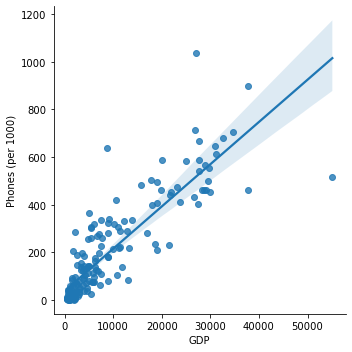

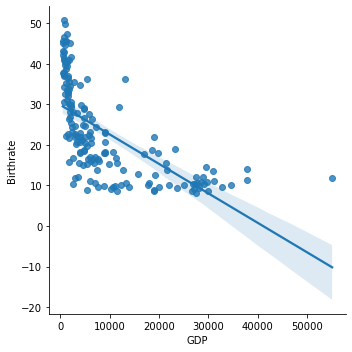

In [43]:
sns.lmplot(x="GDP",y="Phones (per 1000)",data=df,height=5)
sns.lmplot(x="GDP",y="Birthrate",data=df,height=5)